In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

In [5]:
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\exc.csv')

In [6]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [7]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=7588, step=1)

In [9]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [10]:
df.isna().sum()

date       0
Ex_rate    0
dtype: int64

[Text(0.5, 1.0, 'JPY to USD exchange rate'),
 Text(0.5, 394.72222222222223, 'Date'),
 Text(112.59722222222221, 0.5, 'Rate')]

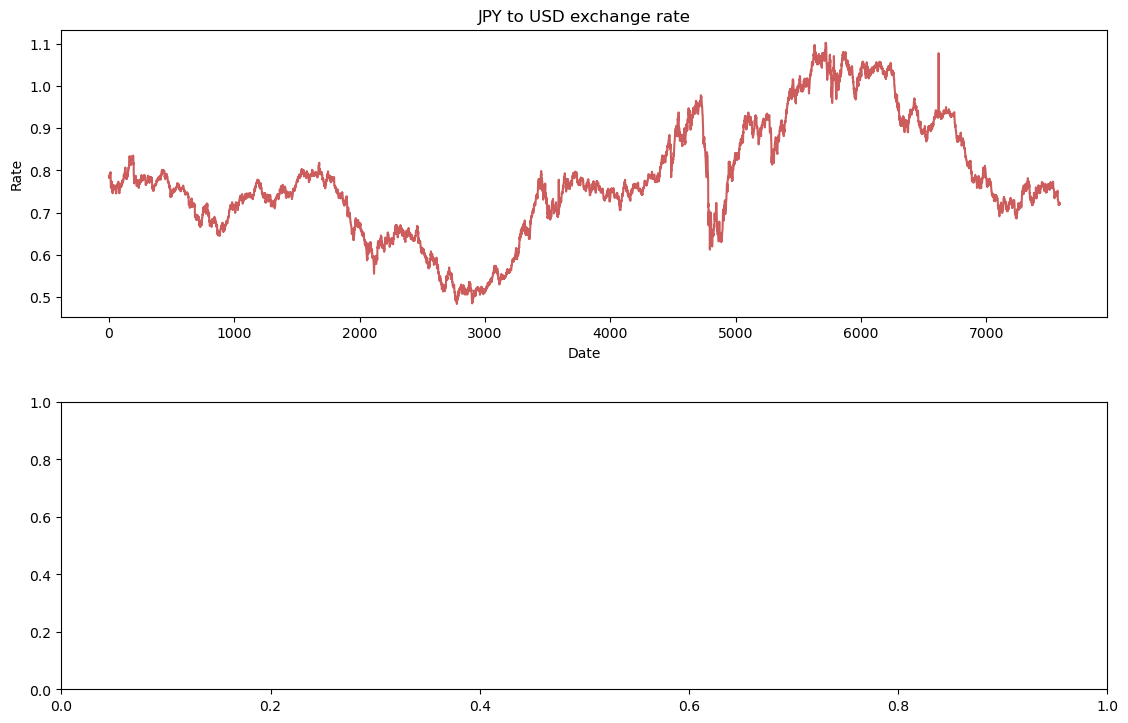

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
fig.tight_layout(pad=4)
ax1.plot(df["Ex_rate"], color="indianred")
ax1.set(title="JPY to USD exchange rate",
        xlabel="Date",
        ylabel="Rate")

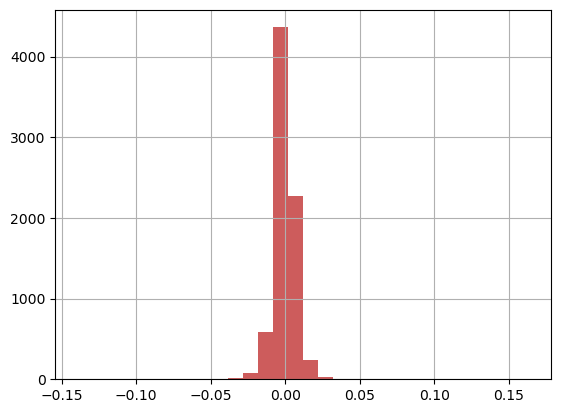

In [12]:
JPY_USD = (df["Ex_rate"] - df["Ex_rate"].shift(1)) / df["Ex_rate"].shift(1)
JPY_USD.hist(bins=30, color="indianred");

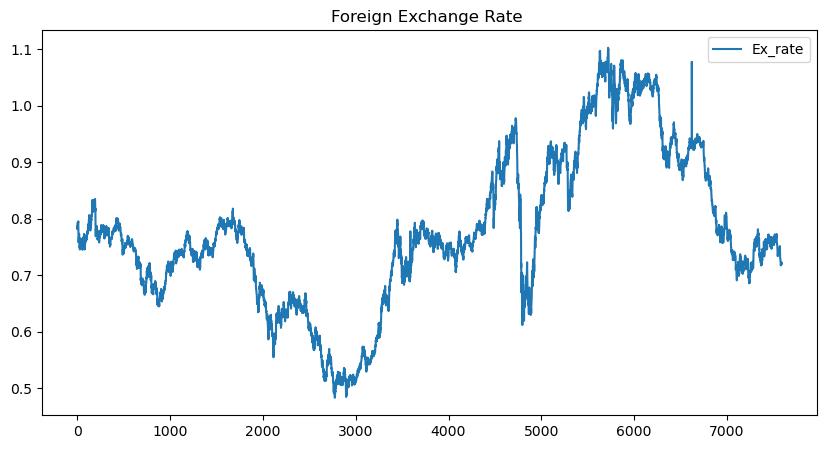

In [13]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate ')
plt.savefig('Foreign Exchange Rate.png')
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [22]:
adf_check(df.Ex_rate)

Test Statistic                   -1.664994
p-value                           0.449233
Number of Lags Used               1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


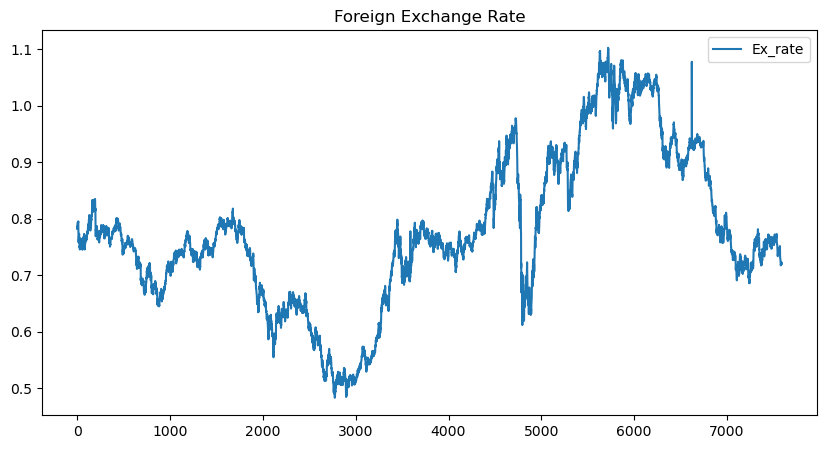

In [23]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate')
plt.savefig('Foreign Exchange Rate ')
plt.show()

In [26]:
model = auto_arima(df.Ex_rate , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

C:\Users\aaksh\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=0.99 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=1.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=1.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=2.46 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=1.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.315, Time=0.85 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 13.187 sec

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Sat, 25 May 2024   AIC                         -56104.319
Time:                        14:05:50   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model = ARIMA(df.Ex_rate , order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(0, 1, 1)   Log Likelihood               28053.377
Date:                Sat, 25 May 2024   AIC                         -56102.753
Time:                        14:06:19   BIC                         -56088.885
Sample:                             0   HQIC                        -56097.994
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1314      0.002    -64.033      0.000      -0.135      -0.127
sigma2      3.596e-05   9.93e-08    362.157      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2868581.59
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

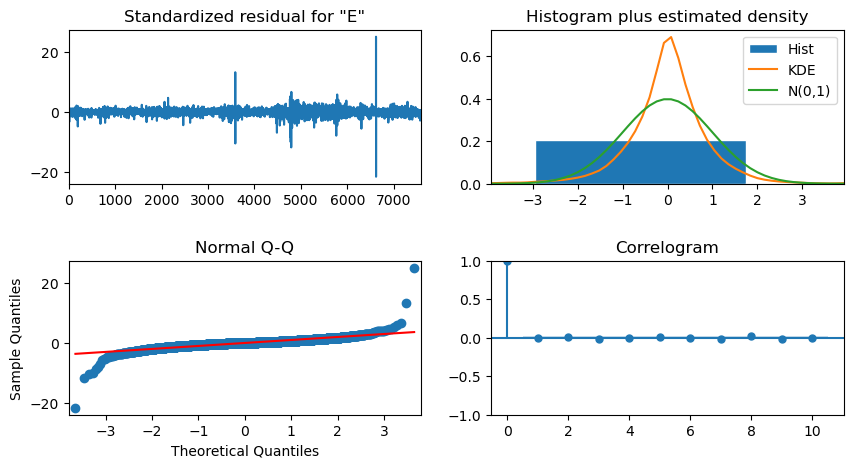

In [30]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [48]:
size = int(len(df)*0.80)
train , test = df[0:size]['Ex_rate'] , df[size:(len(df))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  6070
Counts of Train Data :  1518
